### The following script is used for correcting flow at W11 wetland outfalls that was caused by algal and sediment disturbance

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from datetime import datetime
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# import flow data
df = pd.read_csv('W11 4.1.20-7.8.20.csv')

#rename df columns
df.columns = df.iloc[0]
df = df.rename(columns={"Isco Quantity": "Date", "Flow Rate": "Flow"})

#remove label rows
df = df.drop(index=df.index[0:5])
df = df.reset_index(drop=True)

print(df.head())
print(df.dtypes)

0                 Date    Flow Velocity  Level
0  4/1/2020 2:40:00 PM  -2.046   -1.636  0.438
1  4/1/2020 2:45:00 PM  -2.768   -2.047  0.459
2  4/1/2020 2:50:00 PM  -0.002   -0.003  0.304
3  4/1/2020 2:55:00 PM   0.048    0.034  0.469
4  4/1/2020 3:00:00 PM  -0.288   -0.203  0.472
0
Date        object
Flow        object
Velocity    object
Level       object
dtype: object


In [57]:
#convert date from str to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')

#convert flow, velocity and level from str to numeric format
df['Flow'] = pd.to_numeric(df.Flow, errors='coerce')
df['Velocity'] = pd.to_numeric(df.Velocity, errors='coerce')
df['Level'] = pd.to_numeric(df.Level, errors='coerce')

df.dtypes

0
Date        datetime64[ns]
Flow               float64
Velocity           float64
Level              float64
dtype: object

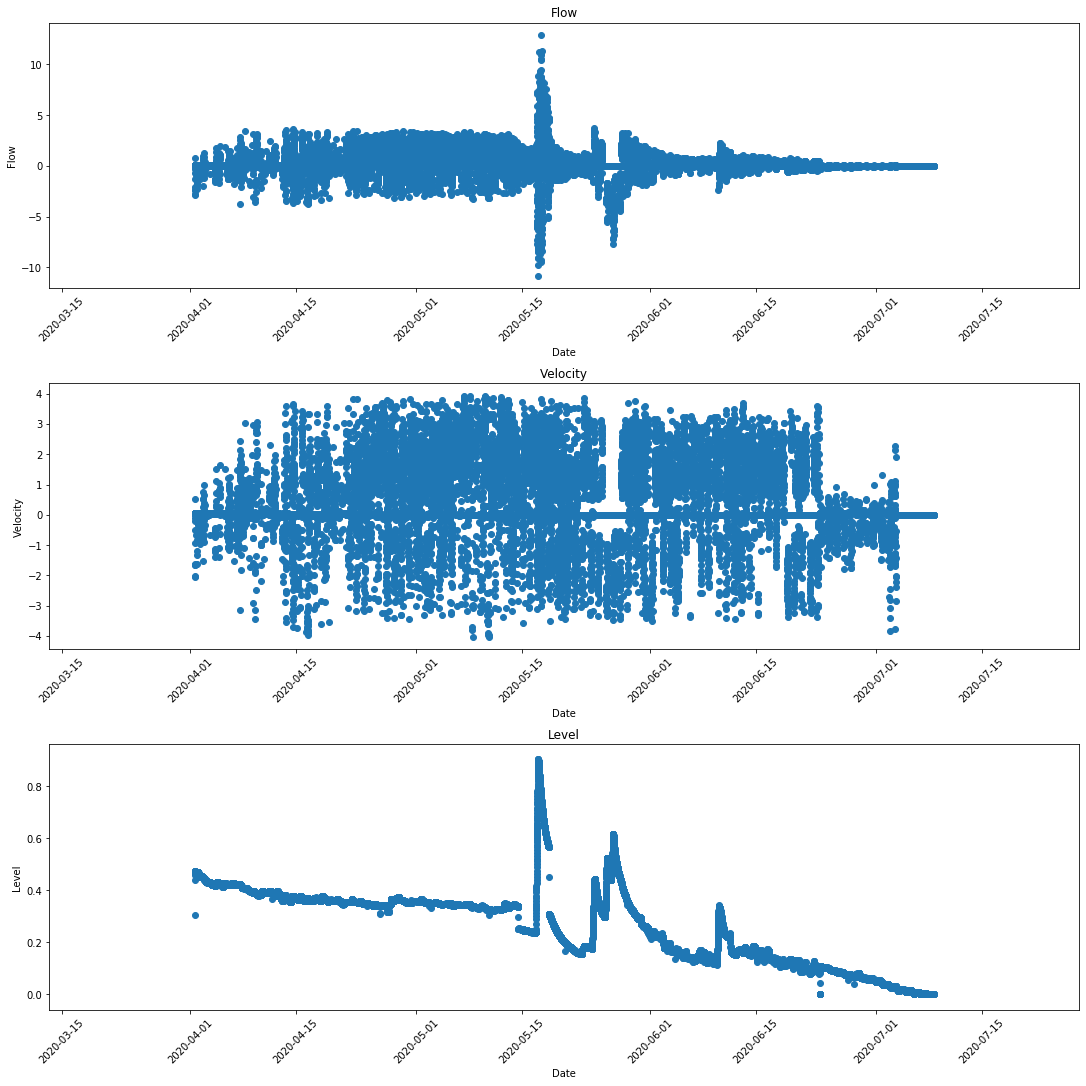

In [64]:
#set figure size
fig = plt.figure(figsize=(15,15))

list_of_analytes = ['Flow', 'Velocity', 'Level']
i = 1

#insert scatter plot data
for x in list_of_analytes:
    ax = fig.add_subplot(3,1,i)
    plt.scatter(df['Date'],df[x])
    plt.title(x)
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel(x)
    i = i + 1

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [ ]:
#try correlation between flow and depth using "good data", then see if we can develop and flow-depth rating curve